In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('diabète.csv', sep = ';')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,sans d,avec d,Outcome
0,6,148,72,35,0,33.6,0.627,50,0.0,1.0,1
1,1,85,66,29,0,26.6,0.351,31,0.0,1.0,0
2,8,183,64,0,0,23.3,0.672,32,0.0,1.0,1
3,1,89,66,23,94,28.1,0.167,21,0.0,1.0,0
4,0,137,40,35,168,43.1,2.288,33,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN,NaN,0
764,2,122,70,27,0,36.8,0.340,27,NaN,NaN,0
765,5,121,72,23,112,26.2,0.245,30,NaN,NaN,0
766,1,126,60,0,0,30.1,0.349,47,NaN,NaN,1


In [4]:
df.shape

(768, 11)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,sans d,avec d,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,500.0,268.0,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.0,1.0,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.0,0.0,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0,1.0,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.0,1.0,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.0,1.0,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,0.0,1.0,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,0.0,1.0,1.000000


In [6]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

C:\Users\lenovo\anaconda3ee\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


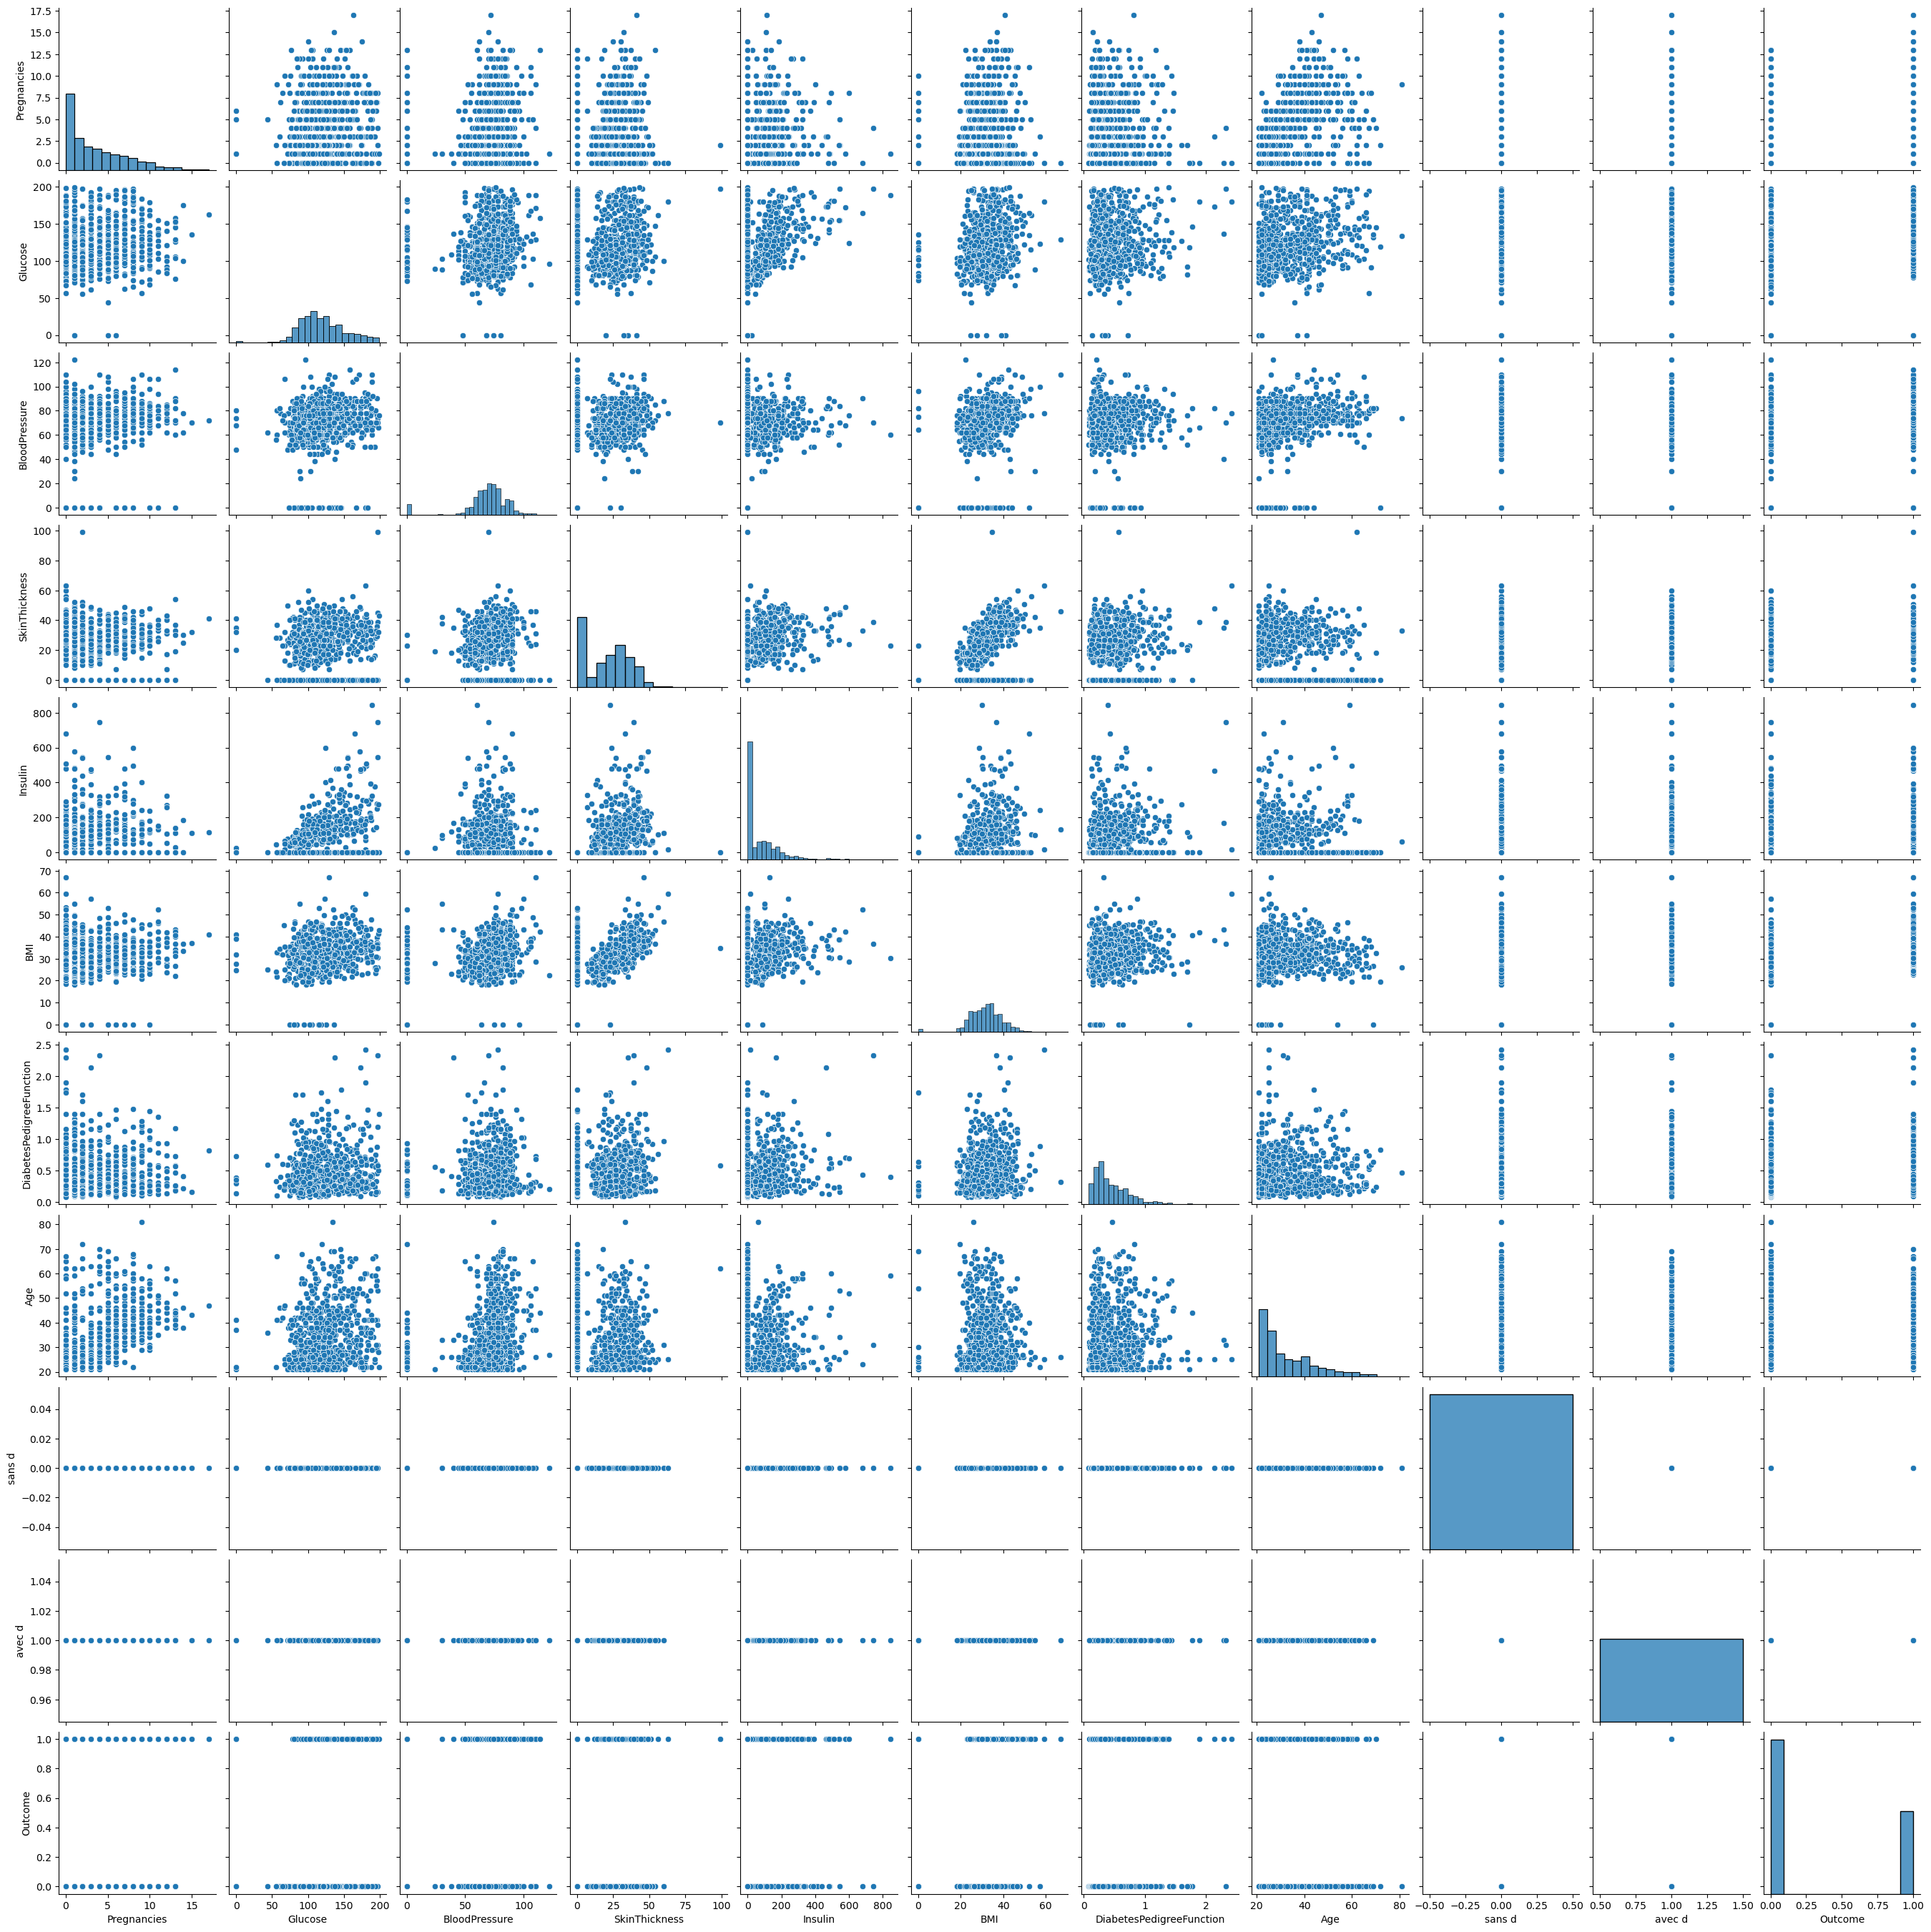

In [7]:
sns.pairplot(df)


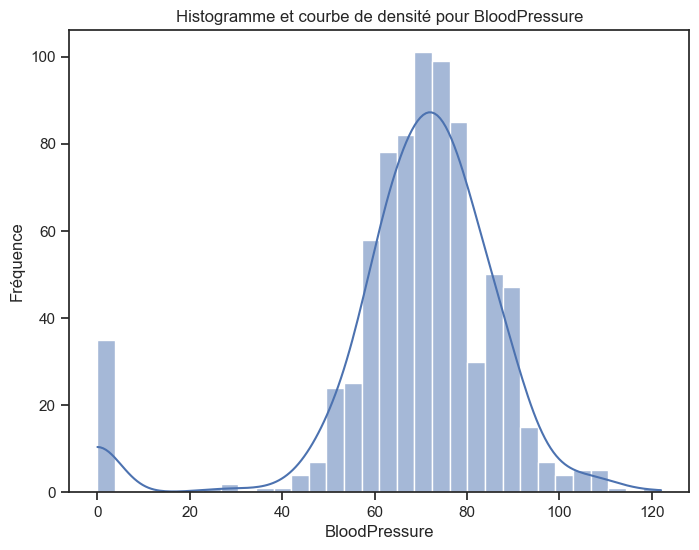

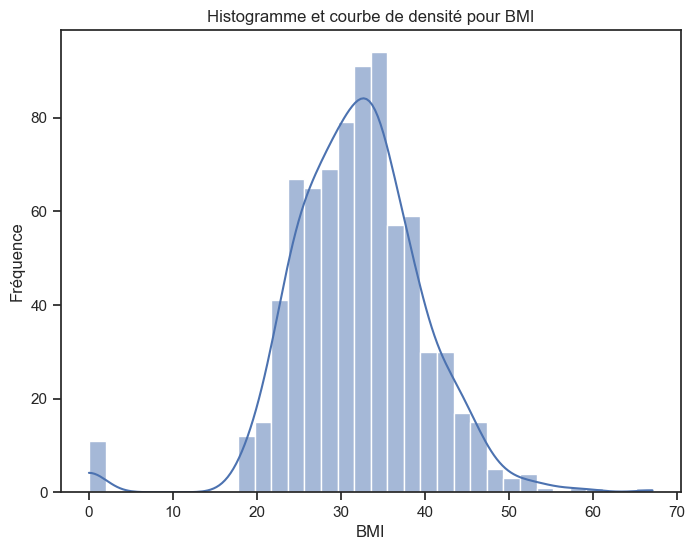

P-valeur de la normalité (Shapiro-Wilk) pour BloodPressure: 1.5844936208677322e-28
P-valeur de la normalité (Shapiro-Wilk) pour BMI: 1.8407586602041262e-15


In [28]:
# Analyse de la normalité grâce au test de shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
var1 = 'BloodPressure'
var2 = 'BMI'

for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()
for var in [var1, var2]:
    _, p_value = shapiro(df[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)

In [29]:
# Calculer les coefficients de corrélation de Spearman, Pearson et Kendall
pearsonr(df[var1], df[var2])

PearsonRResult(statistic=0.28180528884991063, pvalue=1.7378883832374126e-15)

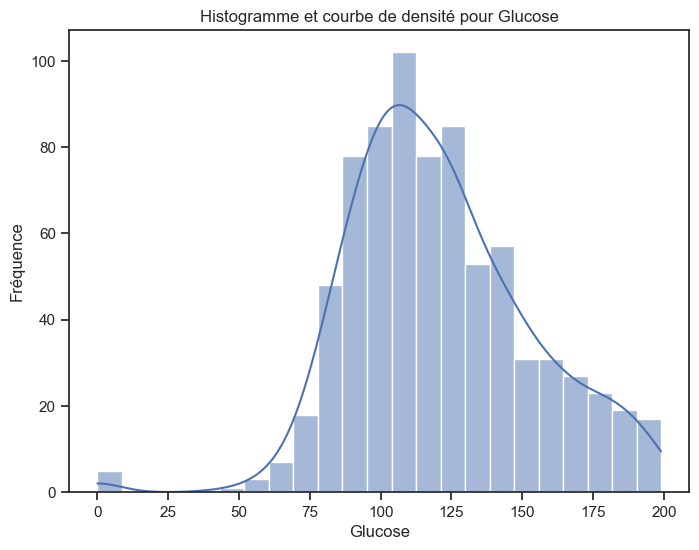

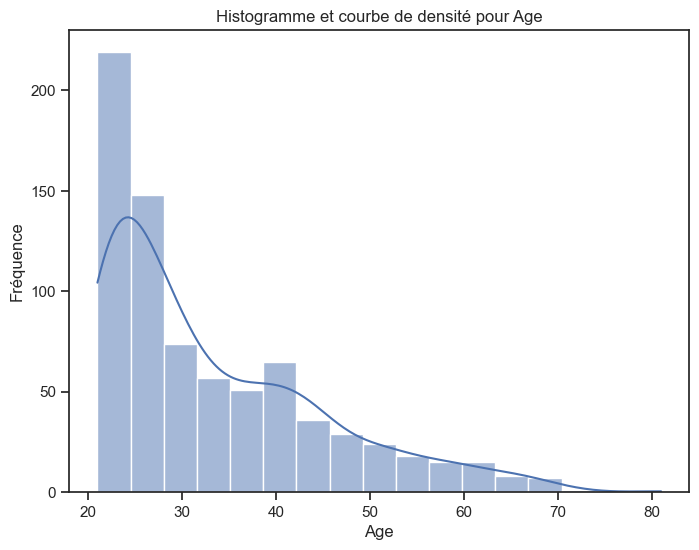

P-valeur de la normalité (Shapiro-Wilk) pour Glucose: 1.987464880170986e-11
P-valeur de la normalité (Shapiro-Wilk) pour Age: 2.401829612553989e-24


In [31]:
# Analyse de la normalité grâce au test de shapiro
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
var1 = 'Glucose'
var2 = 'Age'

for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()
for var in [var1, var2]:
    _, p_value = shapiro(df[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)

In [27]:
pearsonr(df[var1], df[var2])

PearsonRResult(statistic=0.4665813983068741, pvalue=8.935431645289576e-43)

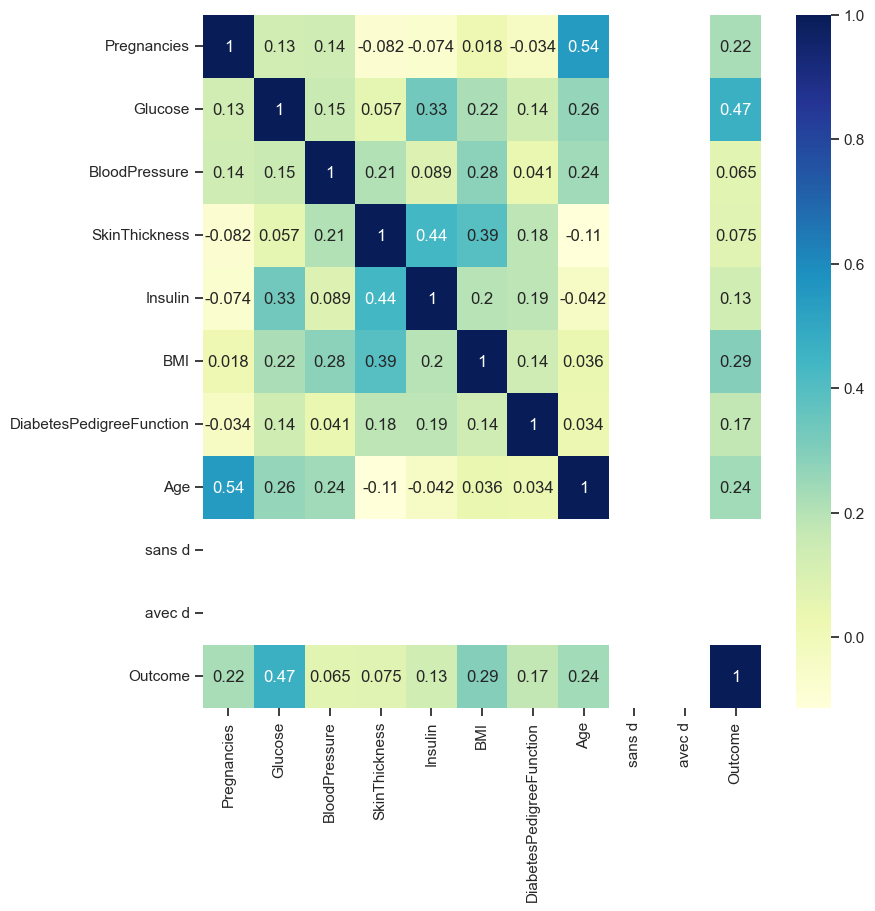

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
sans d                      268
avec d                      500
Outcome                       0
dtype: int64

Pregnancies


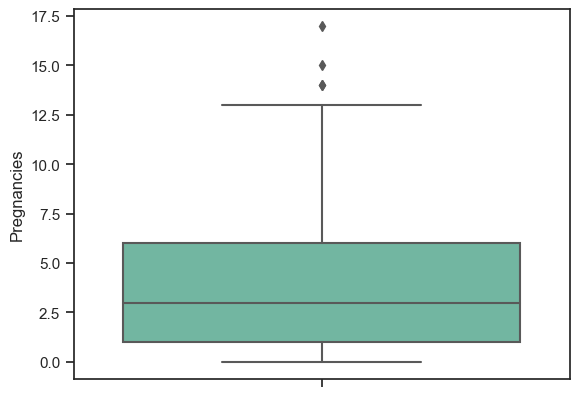

Glucose


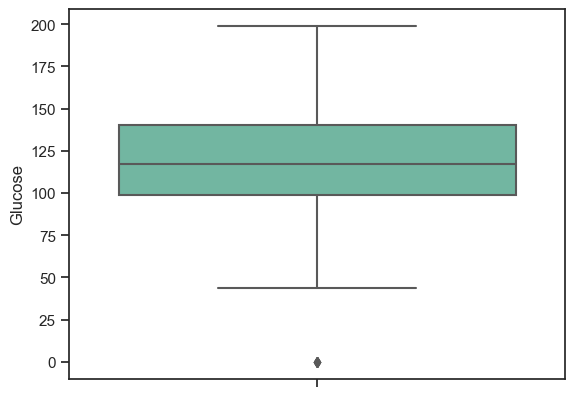

BloodPressure


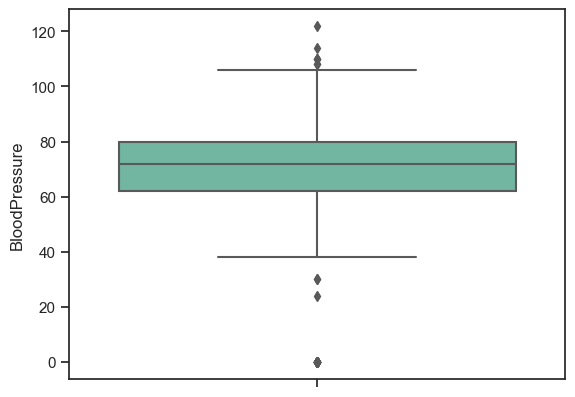

SkinThickness


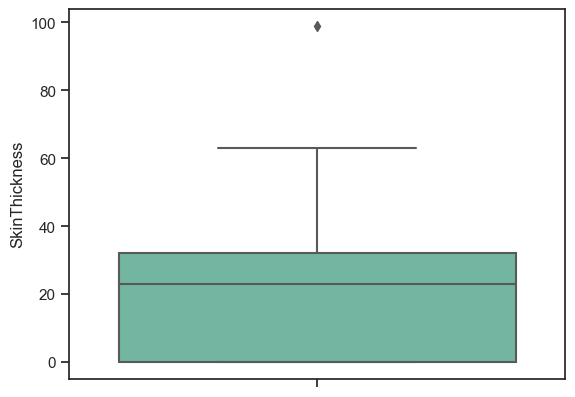

Insulin


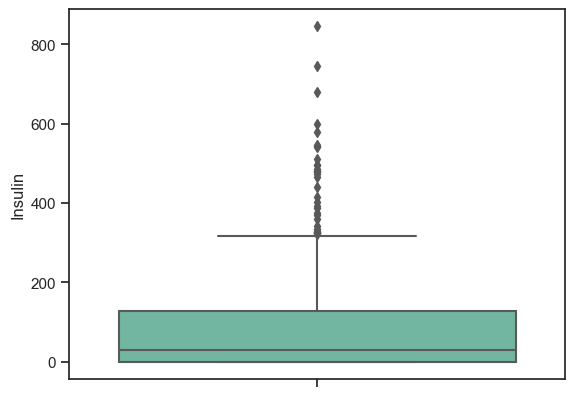

BMI


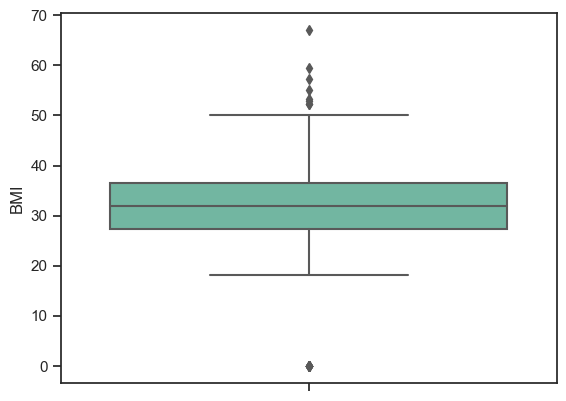

DiabetesPedigreeFunction


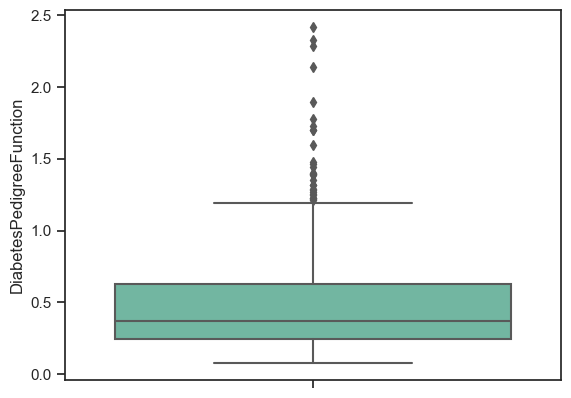

Age


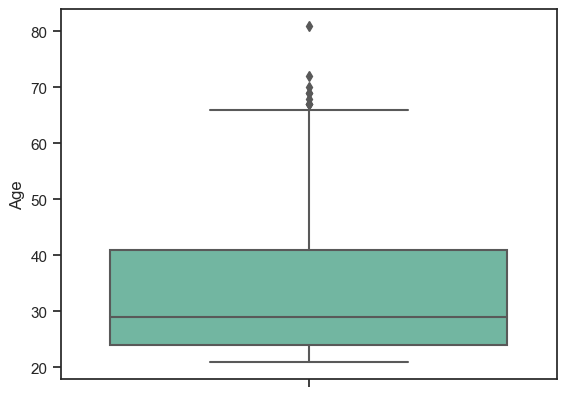

sans d


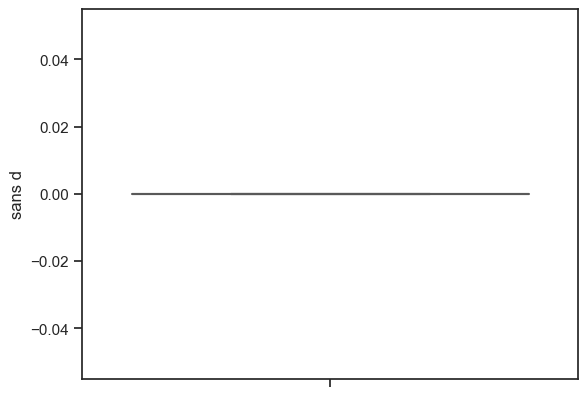

avec d


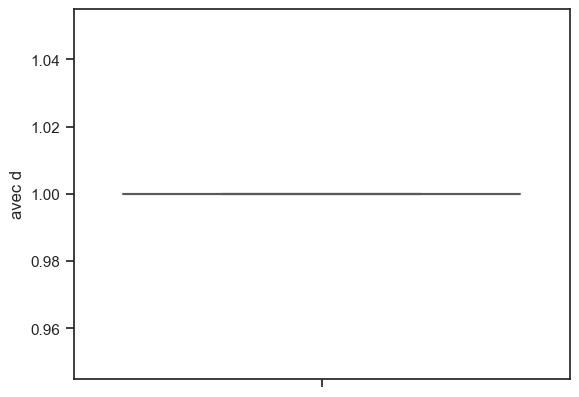

Outcome


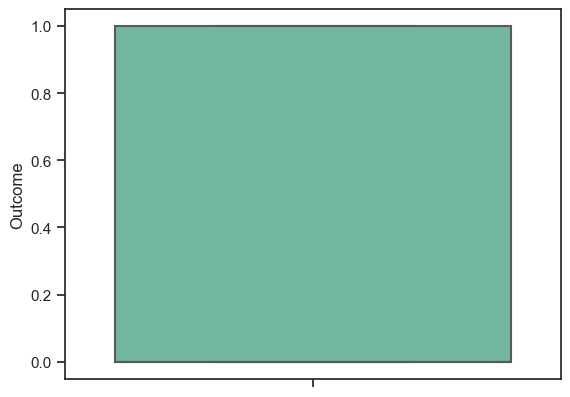

In [10]:
# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in df:
    print(var)
    sns.boxplot(y=var, data=df, palette="Set2")
    plt.show()

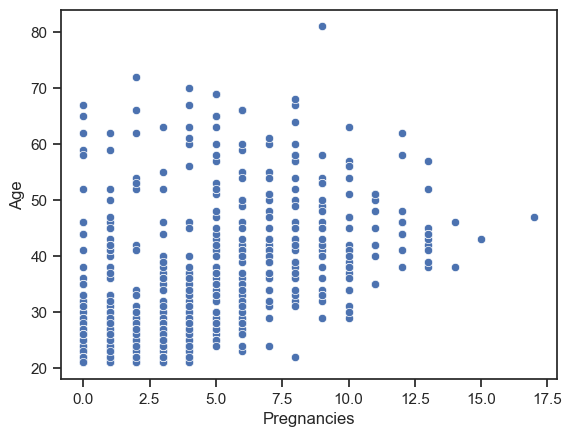

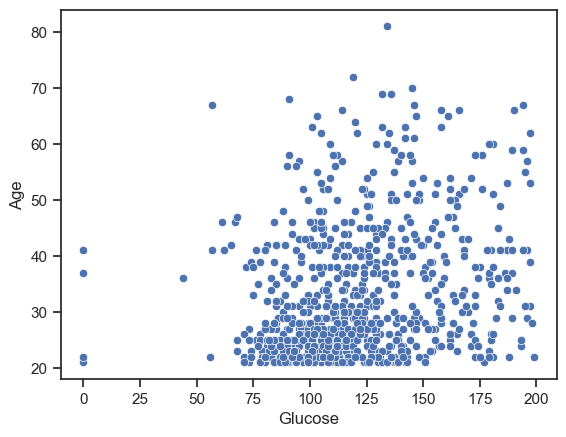

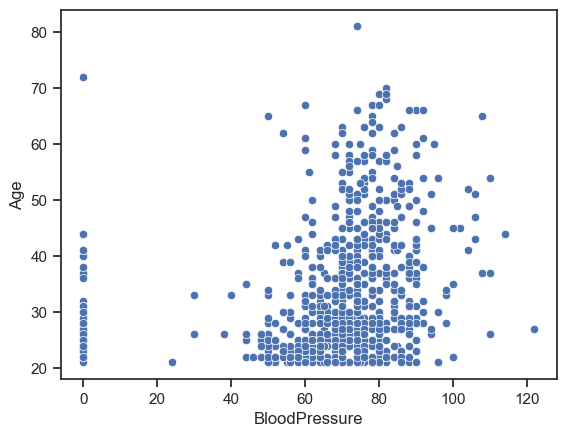

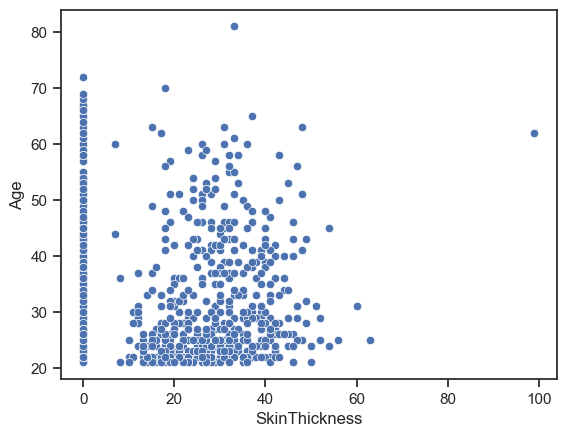

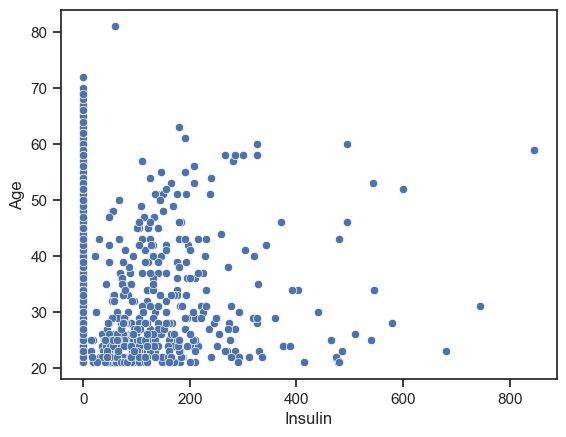

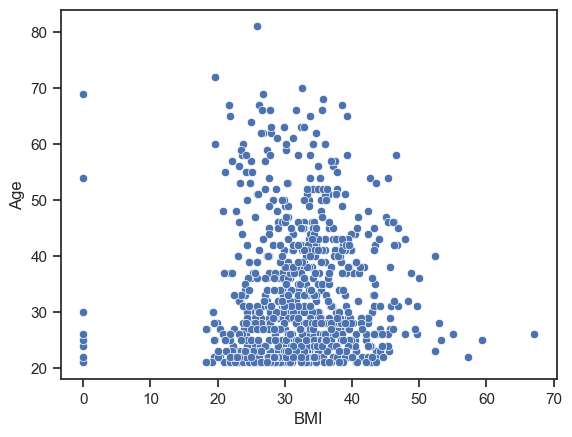

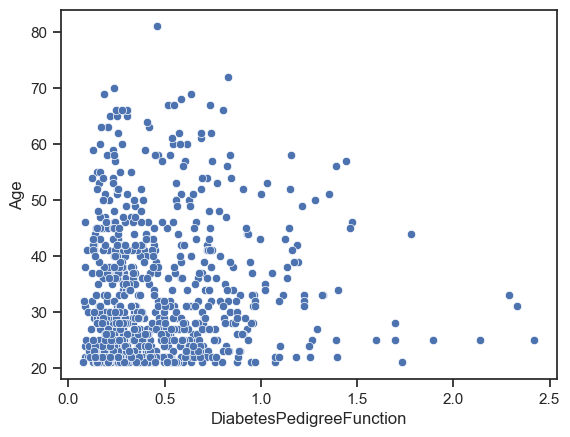

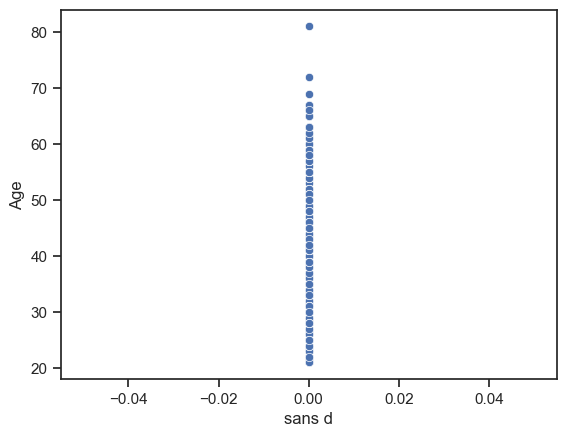

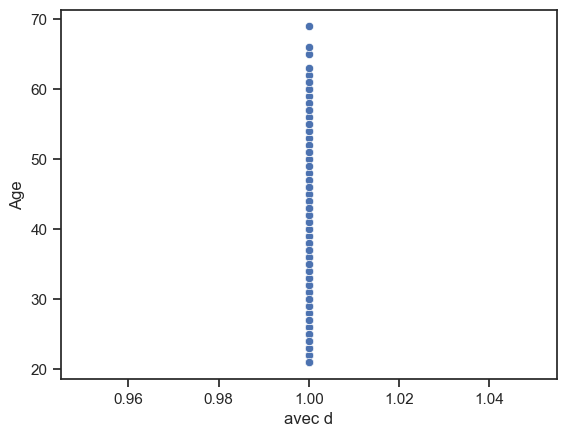

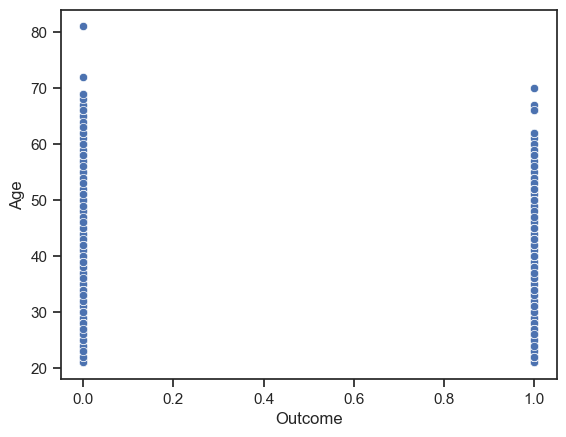

In [13]:
# Extraction des colonnes de variables explicatives
X = df.drop("Age", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=df["Age"])
    plt.show()

<Axes: >

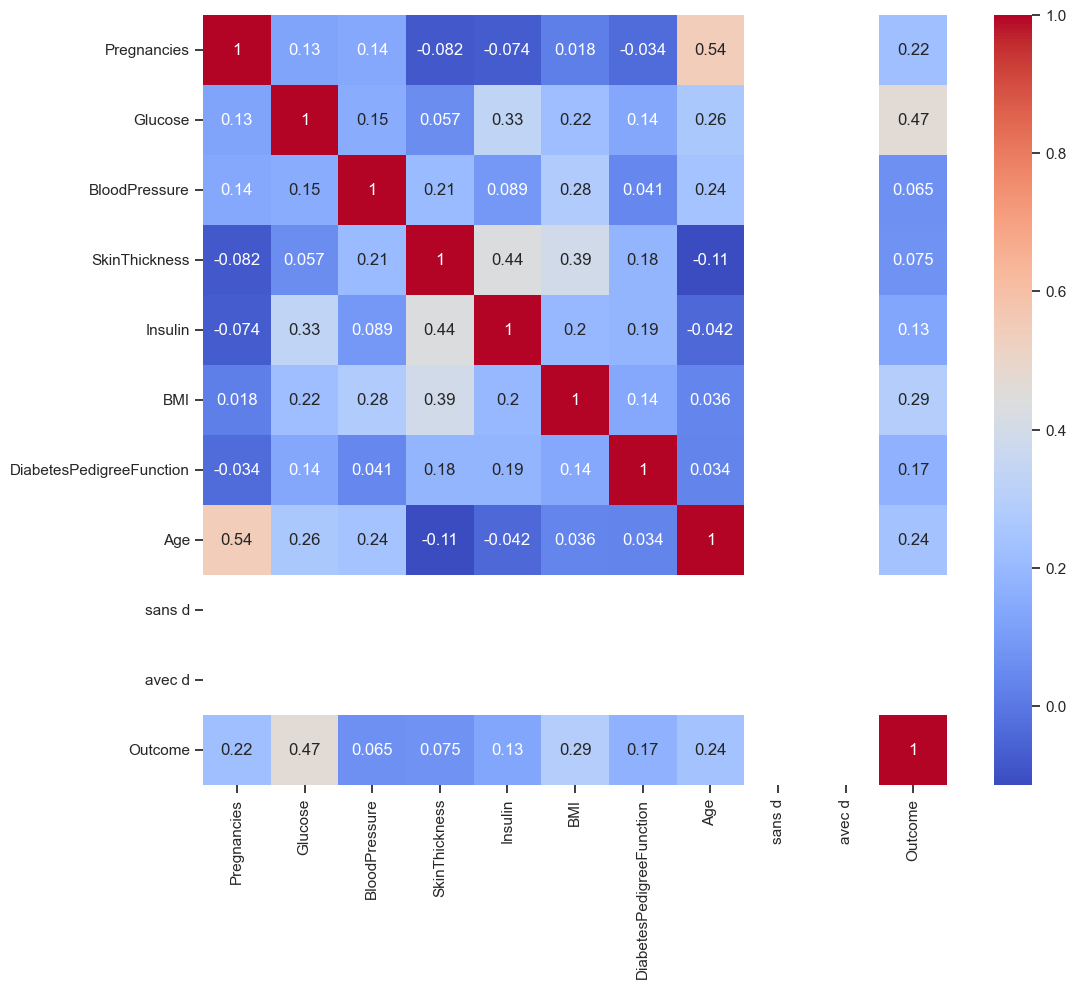

In [14]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

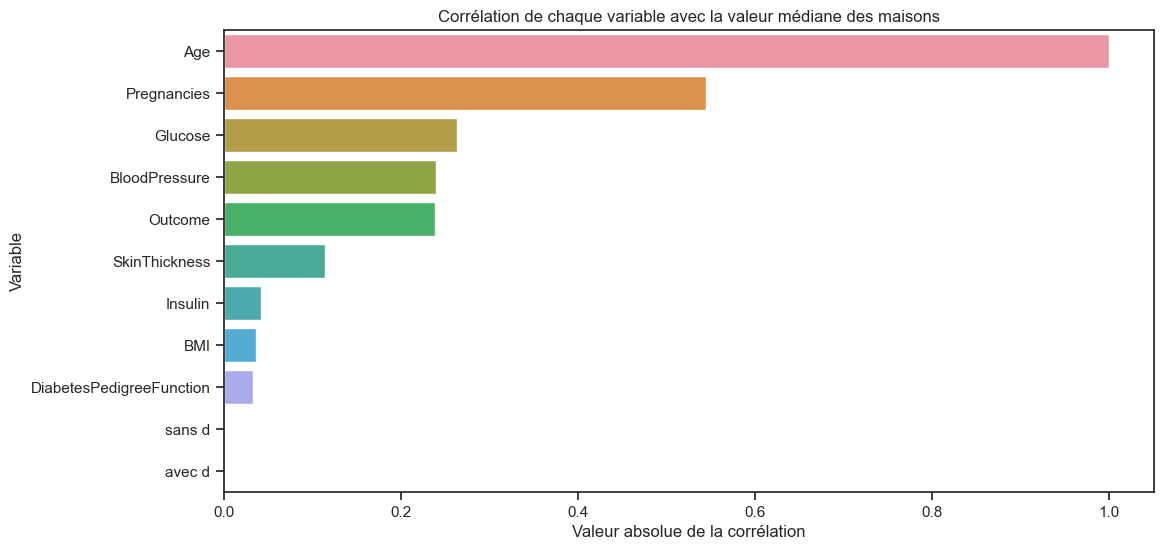

In [15]:
# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(df.corr()["Age"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()